In [21]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


In [22]:
mnist = fetch_openml('mnist_784', version = 1,parser='auto')

(-0.5, 27.5, 27.5, -0.5)

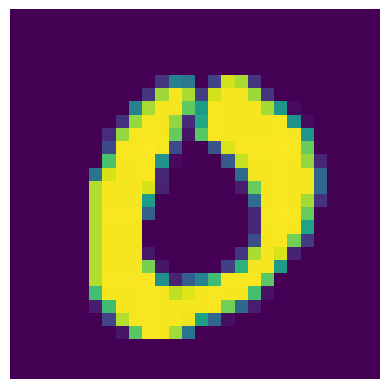

In [24]:
shuffle_index = np.random.permutation(70000)
X=mnist['data'].values[shuffle_index]/255
Y= mnist["target"][shuffle_index]

x_train,x_test,y_train,y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]
digit = x_train[2500]
image = digit.reshape(28,28)
plt.imshow(image)
plt.axis('off')

In [30]:
def vectorized_compute_probabilities(X,theta):
    #Arguements:
    #X is (nxd) matrix (numpy array)
    #theta is a kxd matrix

    #Returns:
    #H - a (kxn) matrix (numpy array) such that each column of H represents the probabilities that the ith 
    #data point takes on each label

    theta_XT = np.matmul(theta, np.transpose(X))
    #taking a columnwise max:
    c = np.amax(theta_XT,axis=0)
    #elementwise exponentation of theta_XT:
    exp_matrix = np.exp(theta_XT-c)
    #computing the normalization factors for each column of H:
    sum_vector = np.sum(exp_matrix,axis=0)

    #broadcasting
    return exp_matrix/sum_vector

In [31]:
theta = np.random.randint(0, 10, [10, x_train.shape[1]])

In [41]:
H=np.matmul(theta, np.transpose(x_train))
c=np.amax(H,axis=0)
exp_matrix=np.exp(H-c)
sum_vector = np.sum(exp_matrix,axis=0)
exp_matrix/sum_vector

array([[1.72506818e-08, 1.06106382e-07, 1.45494440e-29, ...,
        1.59597573e-39, 1.48179040e-21, 1.51260291e-41],
       [7.85628289e-18, 7.31832140e-16, 1.16693902e-40, ...,
        5.27098867e-18, 9.57539020e-01, 7.40362752e-22],
       [9.03940060e-04, 5.26204970e-09, 9.99999988e-01, ...,
        8.44987763e-39, 1.86852768e-03, 1.00000000e+00],
       ...,
       [9.36084488e-16, 4.93325869e-25, 1.56275940e-43, ...,
        1.05635405e-25, 4.33485426e-13, 9.02589040e-19],
       [5.30106689e-16, 1.63075730e-17, 2.57492265e-20, ...,
        1.88997072e-46, 6.73690679e-22, 1.86619098e-32],
       [9.45814167e-20, 2.30225315e-48, 2.56579395e-52, ...,
        2.35559533e-47, 4.48777844e-12, 1.82393151e-33]])

In [54]:
import scipy.sparse as sparse
Y=y_train
n=len(Y) #60.000
k=theta.shape[0] #10
data=[1]*n 
M = sparse.coo_matrix((data, (Y, range(n))), shape=(k,n)).toarray()


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])